# Ejercicio: Construcción de una ANN para un problema de regresión

## Enunciado

Utiliza el dataset de **Boston Housing Prices** para construir una ANN que prediga el precio medio de las viviendas en función de varias características como el tamaño, la accesibilidad, etc.

## Explicación del Dataset

El dataset **California Housing Prices** contiene datos sobre viviendas en California, incluyendo características como:

- Mediana de ingresos en la región.
- Proporción de habitaciones y dormitorios.
- Distancia a centros de empleo, entre otros.

La **salida (target)** es el precio medio de las viviendas en la región, expresado en **cientos de miles de dólares**.


### Diseña la arquitectura de la red con:
- Una capa de entrada completamente conectada con **64 neuronas** y activación **ReLU**.
- Una capa oculta con **32 neuronas** y activación **ReLU**.
- Una capa de salida con **1 neurona** (para la predicción del precio) y activación **lineal**.

### Tareas:
1. Entrena el modelo durante **100 épocas** y utiliza un conjunto de validación.
2. Grafica la pérdida (**loss**) para las fases de entrenamiento y validación.
3. Evalúa el modelo en un conjunto de prueba.


In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns 

In [50]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers

In [25]:
# 1. Cargar datos
data = fetch_california_housing()
# Convertir a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
# Agregar la columna objetivo al DataFrame
df['Target'] = data.target

In [27]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# O seleccionar columnas específicas
selected_columns = ['MedInc', 'HouseAge', 'AveRooms']  # Ajusta según tus necesidades
X = df[selected_columns]

## Separacion entre x y Y

In [30]:
# Dividir en características (X) y objetivo (y)
X = df.drop(columns=['Target'])
y = df['Target']

In [35]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Escalar caracteristicas

In [38]:
# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creacion modelo

In [47]:
# Crear el modelo ANN
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

C:\Users\pere amat\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compilador

In [52]:
# Compilar el modelo
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

## Train Modelo

In [ ]:
# Entrenar el modelo con un conjunto de validación explícito
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),  # Proveer datos de validación
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2427 - mae: 0.3351 - val_loss: 0.2725 - val_mae: 0.3550
Epoch 2/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2408 - mae: 0.3347 - val_loss: 0.2605 - val_mae: 0.3387
Epoch 3/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2365 - mae: 0.3313 - val_loss: 0.2767 - val_mae: 0.3554
Epoch 4/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2410 - mae: 0.3361 - val_loss: 0.2600 - val_mae: 0.3423
Epoch 5/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2482 - mae: 0.3388 - val_loss: 0.2774 - val_mae: 0.3467
Epoch 6/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2442 - mae: 0.3357 - val_loss: 0.2696 - val_mae: 0.3489
Epoch 7/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2482 - mae: 0.3385 - val_loss: 0.2691 - val_mae: 0.3437
Epoch 8/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2335 - mae: 0.3305 - val_loss: 0.2651 - val_mae: 0.3488
Epoch 9/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [61]:
# Evaluar el modelo
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Pérdida en el conjunto de prueba (MSE): {test_loss:.4f}")
print(f"Error absoluto medio (MAE): {test_mae:.4f}")

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2682 - mae: 0.3521
Pérdida en el conjunto de prueba (MSE): 0.2718
Error absoluto medio (MAE): 0.3520


KeyError: 'val_loss'

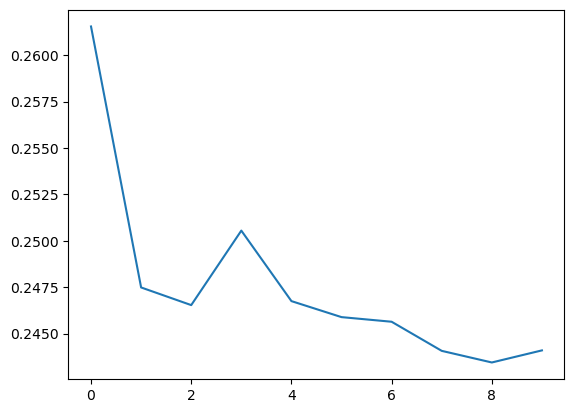

In [65]:
import matplotlib.pyplot as plt

# Graficar la pérdida (train y test) a lo largo de las épocas
plt.plot(history.history['loss'], label='Pérdida de entrenamiento (Train)')
plt.plot(history.history['val_loss'], label='Pérdida de validación (Test)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (Loss)')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.legend()
plt.grid()
plt.show()


### **Interpretación del MAE (Mean Absolute Error):**

#### **Definición:**
- El **MAE** mide el error promedio absoluto entre las predicciones del modelo (\( \hat{y} \)) y los valores reales (\( y \)).
- Su fórmula es:
  \[
  MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
  \]
- Indica cuánto se desvía, en promedio, cada predicción del valor real.

#### **Valores ideales:**
- Un **MAE cercano a 0** indica que el modelo tiene un excelente desempeño, con errores pequeños en promedio.
- El rango de valores aceptables depende de la escala del problema. Por ejemplo:
  - Si los valores reales están en el rango de 0 a 100, un MAE de 1-5 sería excelente.
  - Si los valores están en millones, un MAE de 1,000 podría ser aceptable.

#### **Interpretación de los valores:**
1. **MAE muy bajo (ideal):** 
   - Indica que las predicciones del modelo son cercanas a los valores reales.
   - Es una señal de que el modelo está bien entrenado y generaliza adecuadamente.

2. **MAE moderado:**
   - El modelo tiene errores aceptables pero podría mejorar.
   - Verifica si el error se distribuye uniformemente o si hay regiones del dataset con mayor error.

3. **MAE alto:**
   - Indica que el modelo tiene problemas para capturar patrones en los datos.
   - Puede deberse a:
     - Datos con ruido.
     - Modelo subajustado.
     - Hiperparámetros mal ajustados.

#### **Conclusión:**
- Siempre contextualiza el MAE según la magnitud de los valores reales.
- Para mejorar un MAE alto, puedes:
  - Revisar la calidad de los datos (limpieza y preprocesamiento).
  - Probar arquitecturas de modelo más complejas.
  - Ajustar los hiperparámetros del modelo.


### **Interpretación de \( R^2 \):**

#### **Valores ideales:**
- **\( R^2 = 1 \):** El modelo predice perfectamente los datos. Esto es ideal, pero rara vez se alcanza en problemas del mundo real.
- **\( R^2 > 0.8 \):** En general, se considera que el modelo tiene un buen ajuste en muchos contextos, especialmente en ciencias de datos y problemas de regresión.
- **\( 0.5 < R^2 < 0.8 \):** El modelo explica una parte moderada de la variabilidad de los datos. Puede ser aceptable dependiendo de la naturaleza del problema.
- **\( R^2 \leq 0.5 \):** El modelo explica menos de la mitad de la variabilidad de los datos. Esto podría indicar que el modelo necesita mejoras.

#### **Valores negativos:**
- Si \( R^2 < 0 \), el modelo es peor que simplemente predecir el promedio de los datos de salida (\( \bar{y} \)).
- Esto suele indicar que el modelo no está ajustándose a los datos o que hay un problema con los hiperparámetros o la calidad de los datos.


KeyError: 'val_loss'

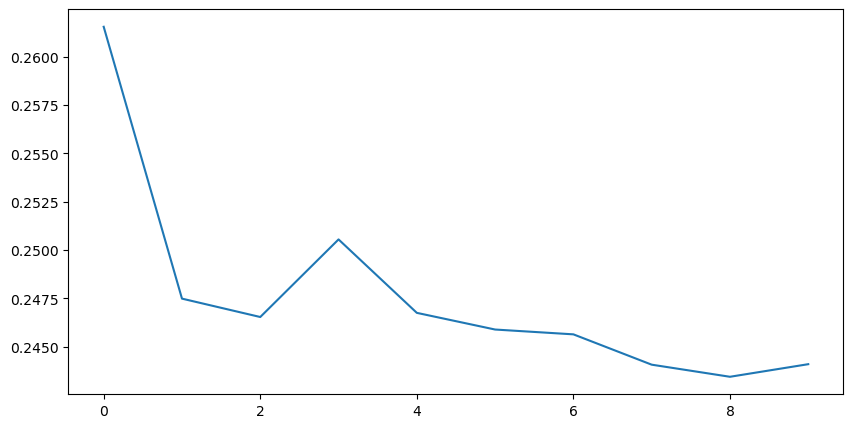

In [63]:

# 7. Graficar pérdida durante el entrenamiento y validación
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### **Interpretación de la Gráfica**

La gráfica muestra la **pérdida (loss)** del modelo durante el entrenamiento y la validación en función de las épocas. Analizando esta gráfica, podemos interpretar cómo está funcionando el modelo ANN y detectar posibles problemas como sobreajuste o subajuste.

---

### **Puntos Clave de la Gráfica**

1. **Curva de pérdida de entrenamiento (Training Loss)**:
   - Representada en color **azul**, muestra cómo disminuye la pérdida en el conjunto de datos de entrenamiento a lo largo de las épocas.
   - En este caso, la curva desciende de forma constante y se estabiliza, lo que indica que el modelo está aprendiendo patrones en los datos de entrenamiento.

2. **Curva de pérdida de validación (Validation Loss)**:
   - Representada en color **naranja**, mide la pérdida del modelo en datos de validación, que no son vistos durante el entrenamiento.
   - La curva también desciende inicialmente y se estabiliza con oscilaciones hacia el final.

3. **Relación entre las curvas**:
   - Ambas curvas son bastante cercanas al final del entrenamiento, lo que indica que el modelo tiene una **buena capacidad de generalización** y no hay un sobreajuste significativo.

4. **Gráfica Ideal**:
   - La pérdida de entrenamiento disminuye rápidamente al inicio y luego se estabiliza cerca de un valor bajo.
   - La pérdida de validación sigue un patrón similar al de la pérdida de entrenamiento, sin divergencias significativas.
   - Ambas curvas convergen al final, indicando buena generalización.

---

### **Evaluación del Rendimiento del Modelo**

1. **¿Está el modelo aprendiendo?**
   - **Sí**, el modelo está aprendiendo, ya que la pérdida de entrenamiento disminuye de manera constante. Esto indica que el modelo está capturando los patrones de los datos.

2. **¿Está el modelo generalizando bien?**
   - **Sí**, ya que la pérdida de validación sigue un patrón similar al de la pérdida de entrenamiento, y ambas convergen hacia valores bajos.
   - Las oscilaciones en la pérdida de validación son aceptables en este caso, ya que no hay un aumento sostenido significativo que indique un sobreajuste.

3. **¿Hay sobreajuste?**  (validation por encima de training)
   - **No parece haber sobreajuste significativo**, ya que:
     - La pérdida de validación no es considerablemente mayor que la de entrenamiento.
     - Ambas curvas se estabilizan alrededor de valores similares.

4. **¿Hay subajuste?** (training por encima de validation)
   - **No**, ya que la pérdida de entrenamiento disminuye lo suficiente y se estabiliza en valores bajos. Esto indica que el modelo tiene suficiente capacidad para aprender los patrones presentes en los datos.

---

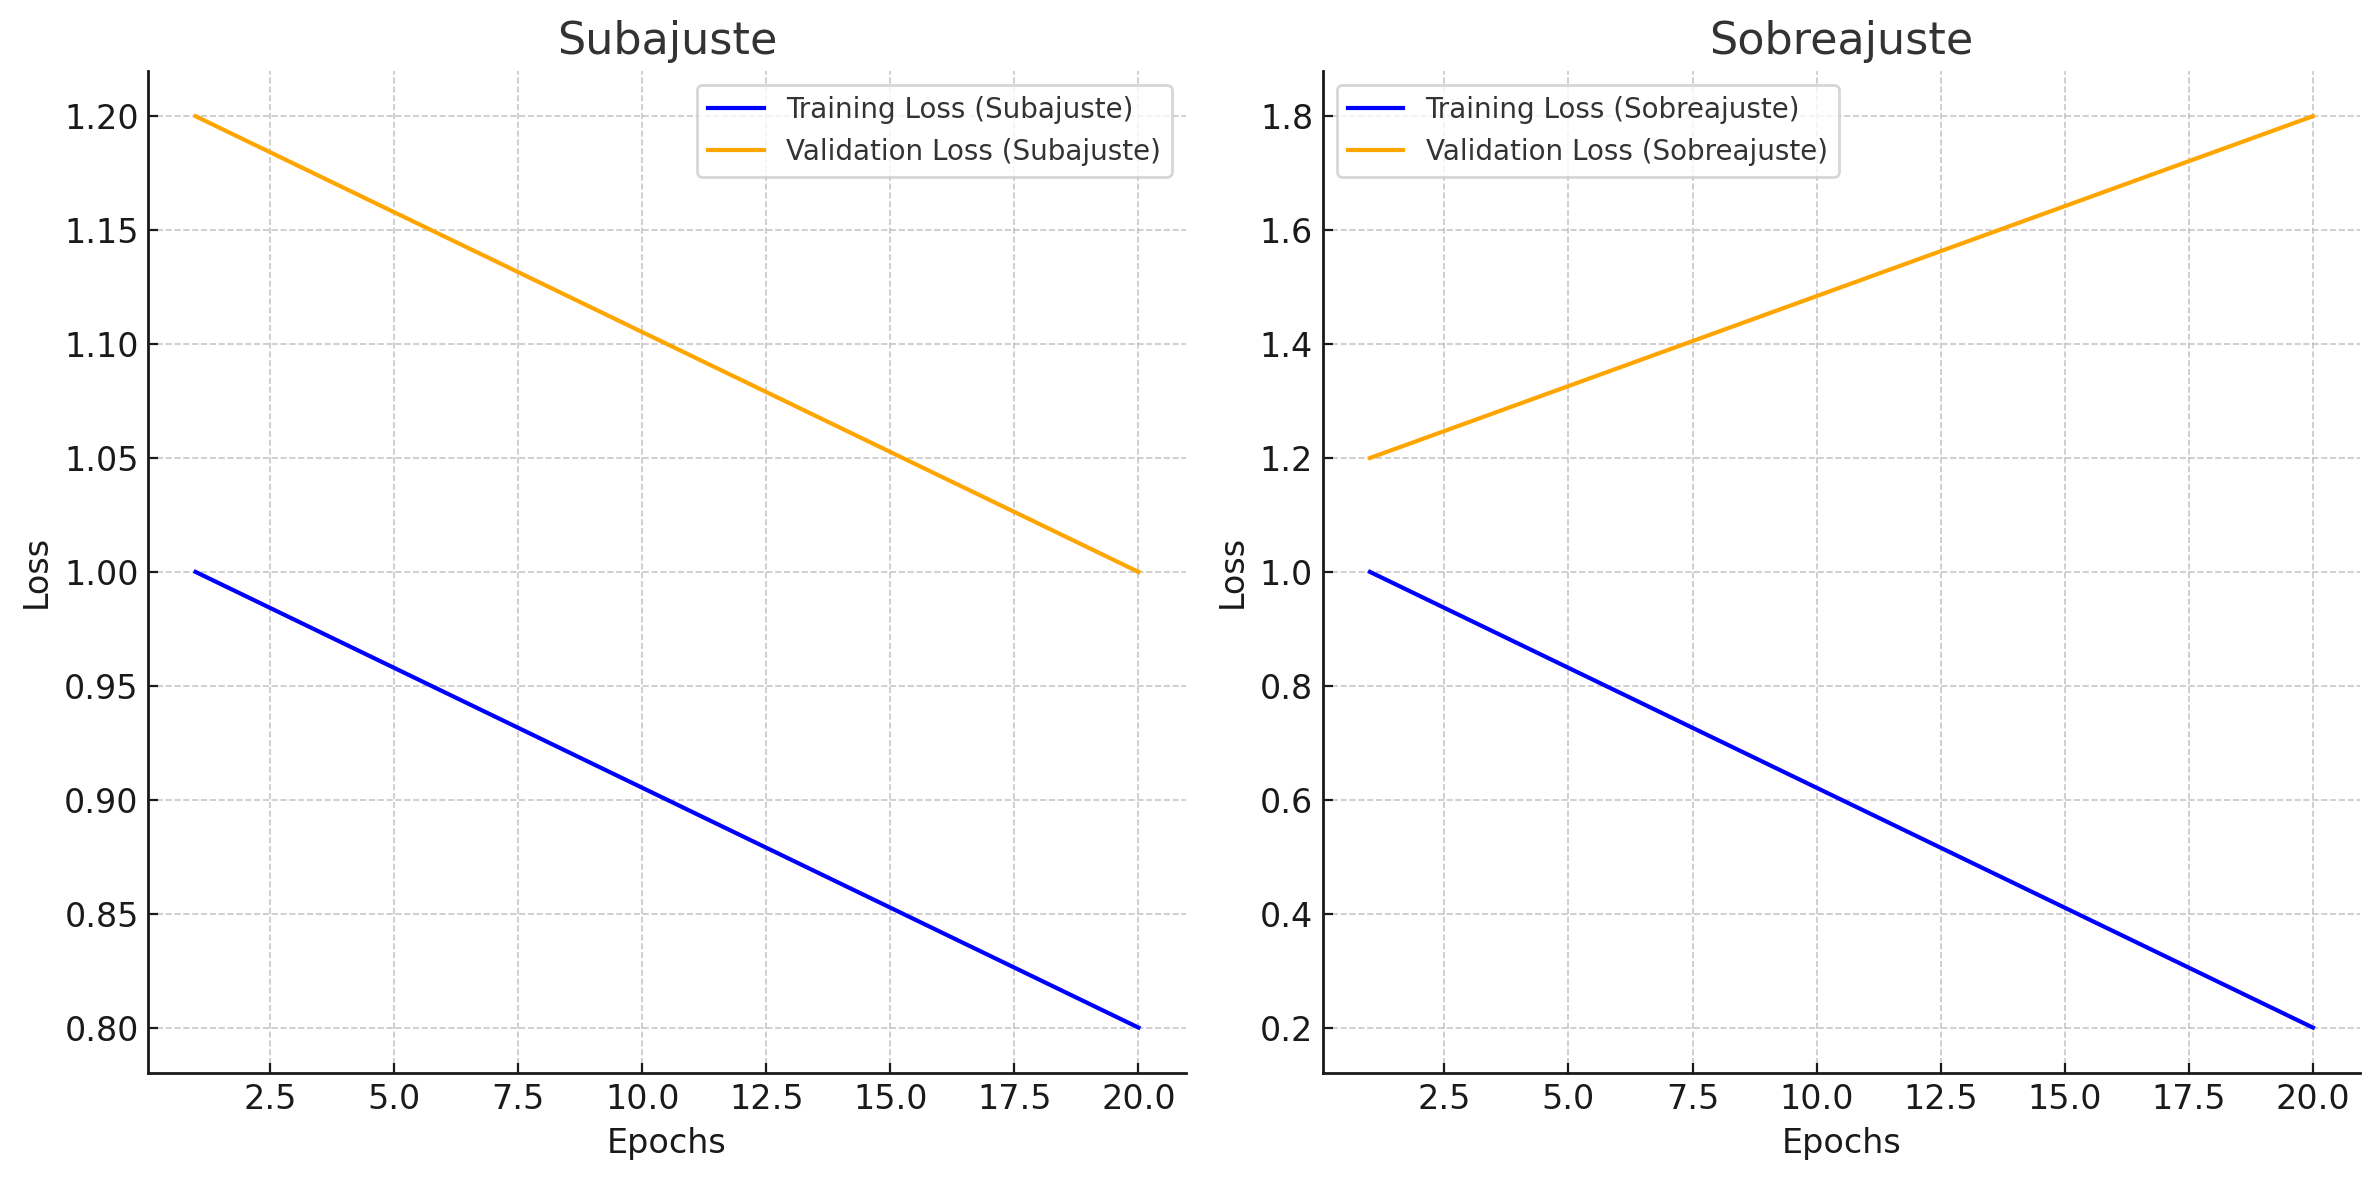

### **Conclusión**

Con base en esta gráfica, el modelo ANN parece estar funcionando **bien**:
- Está aprendiendo los patrones en los datos de entrenamiento de manera efectiva.
- Generaliza correctamente a los datos de validación.
- No hay evidencia de problemas de sobreajuste ni subajuste.

---

### **Recomendaciones Adicionales**

1. **Monitorizar más métricas**:
   - Además de la pérdida, sería útil observar métricas como el **MAE** o el **R²** (en problemas de regresión) para tener una visión más completa del rendimiento del modelo.

2. **Reducir las oscilaciones**:
   - Si se desean reducir las oscilaciones en la pérdida de validación, puedes probar:
     - **Ajustar el learning rate** del optimizador.
     - Aumentar el tamaño del lote (**batch size**).
     - Introducir más regularización, como **Dropout** o penalización L2.

3. **Entrenamiento adicional**:
   - Aunque el modelo parece estar funcionando bien, podrías intentar entrenarlo por más épocas y observar si la pérdida de validación mejora aún más o comienza a divergir.

---

#### EXPLORACIÓN

Antes de iniciar la contstruccion de la red es importante visualizar los datos, en este caso, ya sabemos el contexto pero para asegurarnos, realizaremos
una exploración bàsica para así elegir que parametros en cocnretos son ideales para nuestros datos.